In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scikitplot as skplt 
pd.set_option('display.max_columns',50)
%matplotlib inline

In [2]:
data = pd.read_csv("Cleaned office supply data.csv",index_col=0)

In [3]:
data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,86734.0,238.704762,146803.428571,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,97098.0,281.680000,439984.160000,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,100836.0,432.857143,970465.714286,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,116390.0,0.000000,230193.600000,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,127914.0,1370.166667,27403.333333,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 32 columns):
Customer Number                            16168 non-null float64
Campaign Period Sales                      16168 non-null float64
Historical Sales Volume                    16168 non-null float64
Date of First Purchase                     16168 non-null object
Number of Prior Year Transactions          16168 non-null float64
Do Not Direct Mail Solicit                 16168 non-null float64
Do Not Email                               16168 non-null float64
Do Not Telemarket                          16168 non-null float64
Repurchase Method_NOTICE                   16168 non-null int64
Repurchase Method_PAYMENT PLAN             16168 non-null int64
Last Transaction Channel_BILLING           16168 non-null int64
Last Transaction Channel_BRANCH (PHONE)    16168 non-null int64
Last Transaction Channel_BRANCH (POS)      16168 non-null int64
Last Transaction Channel_IT                1

In [5]:
y = data["Office Supplies_Y"] #target variables
X = data.drop("Office Supplies_Y",axis=1)# input features

In [85]:
y.value_counts()

1    11796
0     4372
Name: Office Supplies_Y, dtype: int64

In [7]:
X

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,86734.0,238.704762,1.468034e+05,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,97098.0,281.680000,4.399842e+05,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,100836.0,432.857143,9.704657e+05,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,116390.0,0.000000,2.301936e+05,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,127914.0,1370.166667,2.740333e+04,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,166988514.0,0.000000,7.012954e+05,1995-12-15 00:00:00,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
16168,167014041.0,0.000000,2.558801e+06,1994-06-01 00:00:00,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16169,167077817.0,0.000000,2.355030e+06,1995-01-01 00:00:00,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16170,167089540.0,0.000000,5.845700e+05,1996-02-01 00:00:00,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [8]:
y

0        1
1        1
2        1
3        1
4        0
        ..
16167    0
16168    0
16169    0
16170    0
16171    0
Name: Office Supplies_Y, Length: 16168, dtype: int64

In [9]:
cols_to_drop = [col for col in data.columns if col.endswith("Y")]
cols_to_drop

['Desk_Y',
 'Executive Chair_Y',
 'Standard Chair_Y',
 'Monitor_Y',
 'Printer_Y',
 'Computer_Y',
 'Insurance_Y',
 'Toner_Y',
 'Office Supplies_Y']

In [10]:
X.drop(cols_to_drop[:-1],axis=1)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,86734.0,238.704762,1.468034e+05,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,97098.0,281.680000,4.399842e+05,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,100836.0,432.857143,9.704657e+05,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,116390.0,0.000000,2.301936e+05,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,127914.0,1370.166667,2.740333e+04,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,166988514.0,0.000000,7.012954e+05,1995-12-15 00:00:00,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16168,167014041.0,0.000000,2.558801e+06,1994-06-01 00:00:00,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
16169,167077817.0,0.000000,2.355030e+06,1995-01-01 00:00:00,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
16170,167089540.0,0.000000,5.845700e+05,1996-02-01 00:00:00,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [11]:
X = X.iloc[:,2:]
X

,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,1.468034e+05,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,4.399842e+05,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,9.704657e+05,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.301936e+05,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.740333e+04,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,7.012954e+05,1995-12-15 00:00:00,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
16168,2.558801e+06,1994-06-01 00:00:00,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16169,2.355030e+06,1995-01-01 00:00:00,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16170,5.845700e+05,1996-02-01 00:00:00,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [12]:
X_in = X.drop("Date of First Purchase",axis=1)
X_in

,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,1.468034e+05,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,4.399842e+05,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,9.704657e+05,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.301936e+05,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.740333e+04,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,7.012954e+05,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
16168,2.558801e+06,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16169,2.355030e+06,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16170,5.845700e+05,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [92]:
from sklearn.utils import resample

In [104]:
minority_class = data.loc[data["Office Supplies_Y"] == 0]
majority_class = data.loc[data["Office Supplies_Y"] == 1]

In [105]:
resampled_minority_class = resample(minority_class,replace = True,n_samples = 11796,random_state = 25)
data_up_sampled = pd.concat([majority_class,resampled_minority_class])

In [106]:
X2_in = data_up_sampled.drop("Office Supplies_Y",axis=1)
y2 = data_up_sampled["Office Supplies_Y"]
X2_in = X2_in.drop("Date of First Purchase",axis=1)# need to come back and finish 


In [21]:
#X_train,X_test,y_train,y_test = train_test_split(X_in, y,random_state=25)

In [107]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2_in, y2,random_state=25)

In [24]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)# works better with better balanced data sampling will do this


C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
lgr.fit(X2_train,y2_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred = lgr.predict(X_test)
lgr.score(X_test,y_test)

0.7978723404255319

In [109]:
pred2 = lgr.predict(X2_test)# logistic regression model did worse when resampling
lgr.score(X2_test,y2_test)


0.4962699220074602

In [110]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500)

In [27]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
forest.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
forest.score(X_test,y_test)

0.9260267194458189

In [113]:
forest.score(X2_test,y2_test) # random forest model performed better when resampling

0.972363513055273

In [29]:
forest.predict_proba(X_test)

array([[0.012, 0.988],
       [0.038, 0.962],
       [0.212, 0.788],
       ...,
       [0.074, 0.926],
       [0.328, 0.672],
       [0.   , 1.   ]])

In [30]:
pred = forest.predict(X_test)

In [19]:
-pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


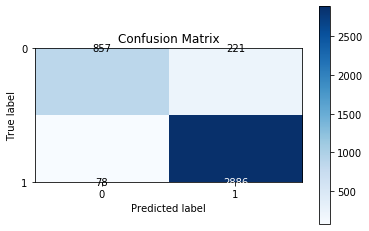

In [31]:
skplt.metrics.plot_confusion_matrix(y_test,pred) # confusion matrix tells us what we got right and wrong
# want to limit the people we predicted were 1s but were actually 0 so the -166
# it is a business and we dont want to predict people that wont buy b/c we will lose money
# we will use predict_proba to go back and fix these

In [32]:
prob = forest.predict_proba(X_test)
prob

array([[0.012, 0.988],
       [0.038, 0.962],
       [0.212, 0.788],
       ...,
       [0.074, 0.926],
       [0.328, 0.672],
       [0.   , 1.   ]])

In [33]:
new_predictions = np.where(prob[:,1]<.4,0,1)
new_predictions

array([1, 1, 1, ..., 1, 1, 1])

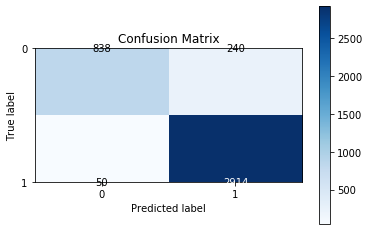

In [34]:
skplt.metrics.plot_confusion_matrix(y_test,new_predictions)

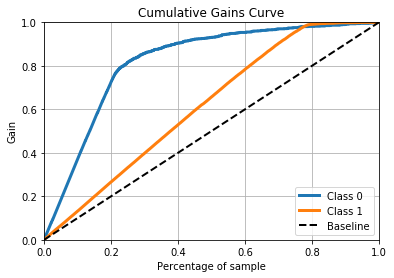

In [35]:
skplt.metrics.plot_cumulative_gain(y_test,prob) # tells you the added gain of a model

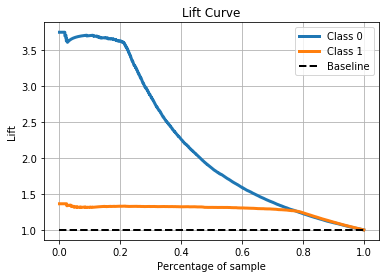

In [36]:
skplt.metrics.plot_lift_curve(y_test,prob) # lift chart tells you that as you take some type of sample it showing the lift over the baseline
plt.legend(loc = "upper right")# tells you how much you lift has proved over the baseline

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


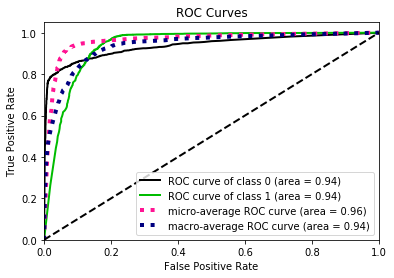

In [37]:
skplt.metrics.plot_roc_curve(y_test,prob)# tells the quality of the model and the overall performance of the model
# speaks to how the true postive rate and false postive rate

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


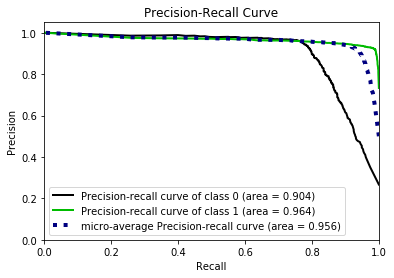

In [39]:
skplt.metrics.plot_precision_recall_curve(y_test,prob)

In [40]:
import statsmodels.api as sm

In [50]:
E(profit) = .22*(prob_sale)*(est_transaction_size)-8.40*(prob_sale)-45.65

SyntaxError: can't assign to function call (<ipython-input-50-fdc9727921b7>, line 1)

In [41]:
X["predicted_prob_sale"] = lgr.predict_proba(X.drop("Date of First Purchase",axis=1))[:,1]
X["predicted_prob_sale"]

0        0.814606
1        0.886737
2        0.816674
3        0.838637
4        0.895286
           ...   
16167    0.490715
16168    0.370600
16169    0.369870
16170    0.480650
16171    0.367645
Name: predicted_prob_sale, Length: 16168, dtype: float64

In [42]:
X

,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English,predicted_prob_sale
0,1.468034e+05,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.814606
1,4.399842e+05,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.886737
2,9.704657e+05,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.816674
3,2.301936e+05,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.838637
4,2.740333e+04,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.895286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,7.012954e+05,1995-12-15 00:00:00,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.490715
16168,2.558801e+06,1994-06-01 00:00:00,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.370600
16169,2.355030e+06,1995-01-01 00:00:00,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.369870
16170,5.845700e+05,1996-02-01 00:00:00,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.480650


In [43]:
data.head(2)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,86734.0,238.704762,146803.428571,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,97098.0,281.680000,439984.160000,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [44]:
y_regression = data["Campaign Period Sales"]

In [45]:
X_regression = data.drop(["Campaign Period Sales"],axis=1)

In [46]:
X_regression = X_regression.drop(cols_to_drop,axis=1)

In [47]:
X_regression

,Customer Number,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,86734.0,1.468034e+05,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,97098.0,4.399842e+05,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,100836.0,9.704657e+05,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,116390.0,2.301936e+05,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,127914.0,2.740333e+04,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,166988514.0,7.012954e+05,1995-12-15 00:00:00,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16168,167014041.0,2.558801e+06,1994-06-01 00:00:00,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
16169,167077817.0,2.355030e+06,1995-01-01 00:00:00,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
16170,167089540.0,5.845700e+05,1996-02-01 00:00:00,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [48]:
X_regression = X_regression.drop(["Customer Number","Date of First Purchase"],axis = 1)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_regression,y_regression,random_state = 25) #random state for consistent data every time

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
X["regression_pred"] = lr.predict(X_regression)# predicts how much is purchased

In [84]:
X

,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Last Transaction Channel_missing,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English,predicted_prob_sale,regression_pred
0,1.468034e+05,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.814606,169.449002
1,4.399842e+05,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.886737,245.904121
2,9.704657e+05,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.816674,55.419581
3,2.301936e+05,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.838637,1.528790
4,2.740333e+04,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.895286,1076.149853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,7.012954e+05,1995-12-15 00:00:00,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.490715,692.378794
16168,2.558801e+06,1994-06-01 00:00:00,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.370600,531.135290
16169,2.355030e+06,1995-01-01 00:00:00,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.369870,511.161866
16170,5.845700e+05,1996-02-01 00:00:00,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.480650,474.279044


In [50]:
model = sm.OLS(y_train,X_train)

In [51]:
results = model.fit()

In [52]:
print(results.summary2())

                               Results: Ordinary least squares
Model:                      OLS                     Adj. R-squared (uncentered):   0.321      
Dependent Variable:         Campaign Period Sales   AIC:                           190930.4229
Date:                       2020-03-08 11:38        BIC:                           191078.4850
No. Observations:           12126                   Log-Likelihood:                -95445.    
Df Model:                   20                      F-statistic:                   287.9      
Df Residuals:               12106                   Prob (F-statistic):            0.00       
R-squared (uncentered):     0.322                   Scale:                         4.0273e+05 
----------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------------

In [53]:
X_regression.columns

Index(['Historical Sales Volume', 'Number of Prior Year Transactions',
       'Do Not Direct Mail Solicit', 'Do Not Email', 'Do Not Telemarket',
       'Repurchase Method_NOTICE', 'Repurchase Method_PAYMENT PLAN',
       'Last Transaction Channel_BILLING',
       'Last Transaction Channel_BRANCH (PHONE)',
       'Last Transaction Channel_BRANCH (POS)', 'Last Transaction Channel_IT',
       'Last Transaction Channel_MAIL', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 'Last Transaction Channel_missing',
       'Number of Employees_large', 'Number of Employees_medium',
       'Number of Employees_small', 'Number of Employees_unknown',
       'Language_Not-English'],
      dtype='object')

In [63]:
predictions = model.predict(results.params,exog=X_test)#exog variable not affected by other variables it is fixed in the model

In [62]:
y_test

7621       0.000000
3845       0.000000
14722      0.000000
11889      0.000000
12547    631.453333
            ...    
8040       0.000000
12768    284.320000
10250      0.000000
5632       0.000000
10773    822.016000
Name: Campaign Period Sales, Length: 4042, dtype: float64

In [80]:
def rmse(y_test,pred):
    return np.sqrt(np.mean((y_test-pred)**2))

In [81]:
base = rmse(y_test,predictions)
base

612.4545942349622